# Out-of-core Computation and Data Frames

## Hands-on with Pandas and Polars

The dataset we will be using is the [Full MovieLens Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv). There are 2 files:

- `movies_metadata.csv`: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.
- `ratings.csv`: The main rating file. Contains about 26 million ratings for 45,000 movies by 270,000 users. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

The files are stored in Google Cloud Storage (GCS), with public URLs available for download. Let's download the files and store them in the `data` folder using the `requests` library.

In [1]:
import requests
import os

In [2]:
# Create a folder to store the data
os.makedirs("data", exist_ok=True)

In [3]:
# Download the files
gcs_bucket_url = "https://storage.googleapis.com/su-artifacts/"
file_names = ["movies_metadata.csv", "ratings.csv"]
for name in file_names:
    full_url = gcs_bucket_url + name
    r = requests.get(full_url)
    with open("data/" + name, "wb") as f:
        f.write(r.content)

In [4]:
import pandas as pd
import polars as pl
import seaborn as sns

In Jupyter notebooks, we can use the `%%timeit` magic command to measure the execution time of a cell. It runs the cell multiple times and reports the average execution time. However, it will discard the results of the run.

In [5]:
%%timeit
metadata_pd = pd.read_csv("data/movies_metadata.csv")

<magic-timeit>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
<magic-timeit>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
<magic-timeit>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
<magic-timeit>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
<magic-timeit>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
<magic-timeit>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
<magic-timeit>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.


340 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<magic-timeit>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.


We'll need to re-run the the same code to actually get the results.

In [6]:
metadata_pd = pd.read_csv("data/movies_metadata.csv")

/var/folders/8g/3v10vrkx1bsb97wgk765nc5r0000gp/T/ipykernel_44700/2158343103.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_pd = pd.read_csv("data/movies_metadata.csv")


In [7]:
%%timeit
ratings_pd = pd.read_csv("data/ratings.csv")

4.16 s ± 80.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
ratings_pd = pd.read_csv("data/ratings.csv")

In [9]:
metadata_pd.shape

(45466, 24)

In [10]:
metadata_pd.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [11]:
metadata_pd.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [12]:
ratings_pd.shape

(26024289, 4)

In [13]:
ratings_pd.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [14]:
ratings_pd.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [15]:
%%timeit
metadata_pl = pl.read_csv("data/movies_metadata.csv",
                          infer_schema_length=100000)

129 ms ± 172 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
metadata_pl = pl.read_csv("data/movies_metadata.csv",
                          infer_schema_length=100000)

In [17]:
metadata_pl.head()

adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,f64,str,str,str,str,bool,f64,i64
"""False""","""{'id': 10194, …","""30000000""","""[{'id': 16, 'n…","""http://toystor…","""862""","""tt0114709""","""en""","""Toy Story""","""Led by Woody, …","""21.946943""","""/rhIRbceoE9lR4…","""[{'name': 'Pix…","""[{'iso_3166_1'…","""1995-10-30""",373554033,81.0,"""[{'iso_639_1':…","""Released""",null,"""Toy Story""",false,7.7,5415
"""False""",null,"""65000000""","""[{'id': 12, 'n…",null,"""8844""","""tt0113497""","""en""","""Jumanji""","""When siblings …","""17.015539""","""/vzmL6fP7aPKNK…","""[{'name': 'Tri…","""[{'iso_3166_1'…","""1995-12-15""",262797249,104.0,"""[{'iso_639_1':…","""Released""","""Roll the dice …","""Jumanji""",false,6.9,2413
"""False""","""{'id': 119050,…","""0""","""[{'id': 10749,…",null,"""15602""","""tt0113228""","""en""","""Grumpier Old M…","""A family weddi…","""11.7129""","""/6ksm1sjKMFLbO…","""[{'name': 'War…","""[{'iso_3166_1'…","""1995-12-22""",0,101.0,"""[{'iso_639_1':…","""Released""","""Still Yelling.…","""Grumpier Old M…",false,6.5,92
"""False""",null,"""16000000""","""[{'id': 35, 'n…",null,"""31357""","""tt0114885""","""en""","""Waiting to Exh…","""Cheated on, mi…","""3.859495""","""/16XOMpEaLWkrc…","""[{'name': 'Twe…","""[{'iso_3166_1'…","""1995-12-22""",81452156,127.0,"""[{'iso_639_1':…","""Released""","""Friends are th…","""Waiting to Exh…",false,6.1,34
"""False""","""{'id': 96871, …","""0""","""[{'id': 35, 'n…",null,"""11862""","""tt0113041""","""en""","""Father of the …","""Just when Geor…","""8.387519""","""/e64sOI48hQXyr…","""[{'name': 'San…","""[{'iso_3166_1'…","""1995-02-10""",76578911,106.0,"""[{'iso_639_1':…","""Released""","""Just When His …","""Father of the …",false,5.7,173


In [18]:
metadata_pl.schema

{'adult': Utf8,
 'belongs_to_collection': Utf8,
 'budget': Utf8,
 'genres': Utf8,
 'homepage': Utf8,
 'id': Utf8,
 'imdb_id': Utf8,
 'original_language': Utf8,
 'original_title': Utf8,
 'overview': Utf8,
 'popularity': Utf8,
 'poster_path': Utf8,
 'production_companies': Utf8,
 'production_countries': Utf8,
 'release_date': Utf8,
 'revenue': Int64,
 'runtime': Float64,
 'spoken_languages': Utf8,
 'status': Utf8,
 'tagline': Utf8,
 'title': Utf8,
 'video': Boolean,
 'vote_average': Float64,
 'vote_count': Int64}

In [19]:
%%timeit
ratings_pl = pl.read_csv("data/ratings.csv")

367 ms ± 19.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
ratings_pl = pl.read_csv("data/ratings.csv")

In [21]:
ratings_pl.schema

{'userId': Int64, 'movieId': Int64, 'rating': Float64, 'timestamp': Int64}

In [22]:
%%timeit

metadata_pd.groupby("original_language")[["revenue", "runtime", "vote_average"]].mean().sort_values(["revenue"], ascending=False)

2.47 ms ± 26.6 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
metadata_pd.groupby("original_language")[["revenue", "runtime", "vote_average"]].mean().sort_values(["revenue"], ascending=False)

,revenue,runtime,vote_average
original_language,,,
en,1.517192e+07,93.138712,5.491171
te,8.764064e+06,143.844444,6.217778
zh,8.178148e+06,108.298289,6.366993
ta,7.224359e+06,149.679487,6.692308
hi,5.258316e+06,137.401575,5.779134
...,...,...,...
mt,0.000000e+00,105.000000,0.000000
zu,0.000000e+00,96.000000,8.300000
104.0,NaN,NaN,NaN


In [24]:
%%timeit
ratings_pd.groupby("userId")["rating"].mean()

359 ms ± 3.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Polars recommends `lazy` evaluation, which means that the code is not executed until the results are actually needed. This allows Polars to optimize the execution of the code.
After defining the computation, we can use the `collect` method to force the execution of the code and get the results.

In [25]:
%%timeit
q = (
    metadata_pl.lazy()
    .group_by("original_language")
    .agg(
        pl.mean("revenue").alias("avg_revenue"),
        pl.mean("runtime").alias("avg_runtime"),
        pl.mean("vote_average").alias("avg_vote_average"),
    )
    .sort("avg_revenue", descending=True)
)
q.collect()


868 μs ± 14.2 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [26]:
q = (
    metadata_pl.lazy()
    .group_by("original_language")
    .agg(
        pl.mean("revenue").alias("avg_revenue"),
        pl.mean("runtime").alias("avg_runtime"),
        pl.mean("vote_average").alias("avg_vote_average"),
    )
    .sort("avg_revenue", descending=True)
)
result = q.collect()
print(result)

shape: (93, 4)
┌───────────────────┬─────────────┬─────────────┬──────────────────┐
│ original_language ┆ avg_revenue ┆ avg_runtime ┆ avg_vote_average │
│ ---               ┆ ---         ┆ ---         ┆ ---              │
│ str               ┆ f64         ┆ f64         ┆ f64              │
╞═══════════════════╪═════════════╪═════════════╪══════════════════╡
│ en                ┆ 1.5172e7    ┆ 93.138712   ┆ 5.491171         │
│ te                ┆ 8.7641e6    ┆ 143.844444  ┆ 6.217778         │
│ zh                ┆ 8.1781e6    ┆ 108.298289  ┆ 6.366993         │
│ ta                ┆ 7.2244e6    ┆ 149.679487  ┆ 6.692308         │
│ …                 ┆ …           ┆ …           ┆ …                │
│ wo                ┆ 0.0         ┆ 113.0       ┆ 6.52             │
│ 104.0             ┆ null        ┆ null        ┆ null             │
│ 82.0              ┆ null        ┆ null        ┆ null             │
│ 68.0              ┆ null        ┆ null        ┆ null             │
└──────────────────

If we do not use the `lazy` evaluation, the code will be executed immediately.

In [27]:
%%timeit
result = (
    metadata_pl
    .group_by("original_language")
    .agg(
        pl.mean("revenue").alias("avg_revenue"),
        pl.mean("runtime").alias("avg_runtime"),
        pl.mean("vote_average").alias("avg_vote_average"),
    )
    .sort("avg_revenue", descending=True)
)


864 μs ± 3.44 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [28]:
%%timeit
q = ratings_pl.lazy().group_by("userId").agg(pl.mean("rating").alias("avg_rating"))
result = q.collect()

84.6 ms ± 2.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


> 1. Find the movie with the highest average rating for both `ratings_pd` and `ratings_pl` (using lazy evaluation)
> 2. Time(it) and compare both approaches
> 3. Find the movie with the highest and lowest average rating but only with at least 30 counts for both `ratings_pd` and `ratings_pl`
> 4. Count how many times each user has rated

In [29]:
ratings_pd.groupby("userId").rating.mean()[ratings_pd.groupby("userId").size() >= 30]

userId
4         3.500000
7         3.367925
8         2.991150
9         3.851190
11        3.211454
            ...   
270891    4.095238
270892    3.640000
270893    3.673684
270894    2.516892
270896    3.980769
Name: rating, Length: 136362, dtype: float64

In [30]:
ratings_pl.group_by("userId").agg(
    pl.mean("rating").alias("avg_rating"),
    pl.count("rating").alias("count"),
).filter(pl.col("count") > 30).sort("userId")

userId,avg_rating,count
i64,f64,u32
4,3.5,62
7,3.367925,53
8,2.99115,113
9,3.85119,84
11,3.211454,227
12,3.854839,248
15,3.736726,226
16,4.417582,182
20,3.846296,270


In [31]:
ratings_pd.userId.value_counts()

userId
45811     18276
8659       9279
270123     7638
179792     7515
228291     7410
          ...  
30155         1
9641          1
164717        1
243426        1
234625        1
Name: count, Length: 270896, dtype: int64

In [32]:
ratings_pl.select(pl.col("userId").value_counts(sort=True)).unnest("userId")

userId,counts
i64,u32
45811,18276
8659,9279
270123,7638
179792,7515
228291,7410
243443,6320
98415,6094
229879,6024
98787,5814


In [33]:
avg_ratings_pd = ratings_pd.groupby("movieId").rating.mean().reset_index()

In [34]:
avg_ratings_pd["movieId"] = avg_ratings_pd.movieId.astype("str")

In [35]:
%%timeit
pd.merge(metadata_pd, avg_ratings_pd, left_on="id", right_on="movieId")

14.3 ms ± 116 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
avg_ratings_pl = ratings_pl.group_by("movieId").agg(pl.mean("rating").alias("avg_rating"))
avg_ratings_pl = avg_ratings_pl.select(pl.col("movieId").cast(pl.Utf8), pl.col("avg_rating"))

In [37]:
%%timeit
metadata_pl.join(avg_ratings_pl, left_on="id", right_on="movieId")

3.6 ms ± 346 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Hands-on with Polars Out of Core Processing

The dataset we will be using is the [NYC Taxi Trip Data](https://www.kaggle.com/datasets/neilclack/nyc-taxi-trip-data-google-public-data?select=taxi_trip_data.csv). It contains data on yellow taxi cab trips in New York City. The dataset is about 1.5GB in size, which might be too large to fit in memory (depending on your RAM).

> Read the data dictionary and try to understand the meaning of each column. 

Let's download the file from GCS and store them in the `data` folder.

In [38]:
gcs_bucket_url = "https://storage.googleapis.com/su-artifacts/"
full_url = gcs_bucket_url + 'taxi_trip_data.csv'
r = requests.get(full_url)
with open("data/" + 'taxi_trip_data.csv', "wb") as f:
    f.write(r.content)

> Check out the file size in your file system.

First, we do a read of only `100,000` rows of the file to find out the _dtypes and initial rows_.

In [39]:
df = pl.read_csv('data/taxi_trip_data.csv', n_rows=100000)

df.schema

{'vendor_id': Int64,
 'pickup_datetime': Utf8,
 'dropoff_datetime': Utf8,
 'passenger_count': Int64,
 'trip_distance': Float64,
 'rate_code': Int64,
 'store_and_fwd_flag': Utf8,
 'payment_type': Int64,
 'fare_amount': Float64,
 'extra': Float64,
 'mta_tax': Float64,
 'tip_amount': Float64,
 'tolls_amount': Float64,
 'imp_surcharge': Float64,
 'total_amount': Float64,
 'pickup_location_id': Int64,
 'dropoff_location_id': Int64}

In [40]:
df.head()

vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
i64,str,str,i64,f64,i64,str,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64
2,"""2018-03-29 13:…","""2018-03-29 14:…",1,18.15,3,"""N""",1,70.0,0.0,0.0,16.16,10.5,0.3,96.96,161,1
2,"""2018-03-29 13:…","""2018-03-29 14:…",1,4.59,1,"""N""",1,25.0,0.0,0.5,5.16,0.0,0.3,30.96,13,230
2,"""2018-03-29 13:…","""2018-03-29 13:…",1,0.3,1,"""N""",1,3.0,0.0,0.5,0.76,0.0,0.3,4.56,231,231
2,"""2018-03-29 13:…","""2018-03-29 14:…",2,16.97,1,"""N""",1,49.5,0.0,0.5,5.61,5.76,0.3,61.67,231,138
2,"""2018-03-29 14:…","""2018-03-29 15:…",5,14.45,1,"""N""",1,45.5,0.0,0.5,10.41,5.76,0.3,62.47,87,138


In order to process the data out-of-core, we can use the _streaming API_ of Polars. It allows queries to be executed in a streaming manner on top of the lazy API (execution) we have used.

We will combine that with lazy reading of the file using `scan_csv`. It has the same function signature as `read_csv`, but returns a lazy representation of the data, which means that the data is not loaded into memory until it is needed.

In [41]:
q = (
    pl.scan_csv('data/taxi_trip_data.csv', try_parse_dates=True)
    .select(
        pl.col("pickup_datetime").min().alias("min_pickup_datetime"),
        pl.col("pickup_datetime").max().alias("max_pickup_datetime"),
        pl.col("dropoff_datetime").min().alias("min_dropoff_datetime"),
        pl.col("dropoff_datetime").max().alias("max_dropoff_datetime"),
    )
    .min()
)
q.collect(streaming=True)

min_pickup_datetime,max_pickup_datetime,min_dropoff_datetime,max_dropoff_datetime
datetime[μs],datetime[μs],datetime[μs],datetime[μs]
2001-01-01 00:07:04,2053-07-11 13:25:33,2001-01-01 00:07:30,2053-07-11 13:25:33


In [42]:
q = (
    pl.scan_csv('data/taxi_trip_data.csv', try_parse_dates=True)
    .select(
        (pl.col("dropoff_datetime") - pl.col("pickup_datetime")).alias("trip_duration")
    )
)
print(q.collect(streaming=True).describe())

shape: (9, 2)
┌────────────┬───────────────────┐
│ describe   ┆ trip_duration     │
│ ---        ┆ ---               │
│ str        ┆ str               │
╞════════════╪═══════════════════╡
│ count      ┆ 10000000          │
│ null_count ┆ 0                 │
│ mean       ┆ 0:35:47.026444    │
│ std        ┆ null              │
│ min        ┆ -49 days, 1:54:52 │
│ 25%        ┆ 0:22:42           │
│ 50%        ┆ 0:30:07           │
│ 75%        ┆ 0:38:45           │
│ max        ┆ 6 days, 18:10:05  │
└────────────┴───────────────────┘


In [43]:
q = (
    pl.scan_csv('data/taxi_trip_data.csv', try_parse_dates=True)
    .group_by("passenger_count")
    .agg(pl.mean("trip_distance").alias("avg_trip_distance"))
)
df_pl = q.collect(streaming=True)
df_pl

passenger_count,avg_trip_distance
i64,f64
0,8.396401
5,9.056677
7,3.542609
2,9.027067
8,6.4184
6,9.040133
1,8.783874
4,8.969551
3,9.007313


In [44]:
df_pl.sort("passenger_count")

passenger_count,avg_trip_distance
i64,f64
0,8.396401
1,8.783874
2,9.027067
3,9.007313
4,8.969551
5,9.056677
6,9.040133
7,3.542609
8,6.4184


We can use the rest of the libraries in Python data ecosystem to process the data by converting to `pandas` dataframe. For example, we can use `seaborn` to plot a bar chart.

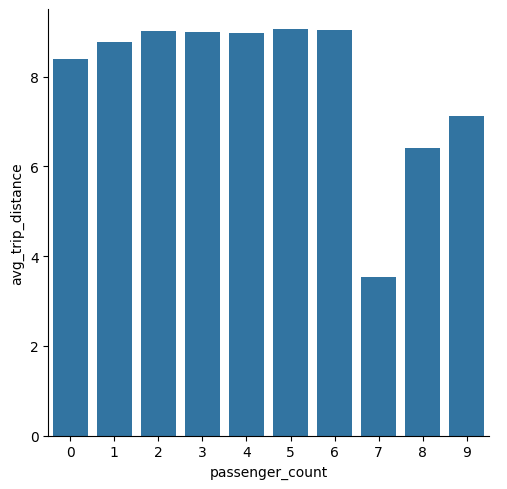

In [45]:
sns.catplot(data=df_pl.to_pandas(), x="passenger_count", y="avg_trip_distance", kind="bar")

> 1. Calculate the speed of each trip (row) in miles per hour. Then `describe` the summary statistics. Note: casting the duration to `Int64` will convert it to microseconds.
> 2. Calculate the average total amount by payment type.
> 3. Calculate the average total amount by payment type and passenger count.
> 4. Calculate the average distance rate (fare amount divide by trip distance) by vendor.

In [46]:
q = (
    pl.scan_csv('data/taxi_trip_data.csv', try_parse_dates=True)
    .select(
        pl.col("trip_distance") / ((pl.col("dropoff_datetime") - pl.col("pickup_datetime")).alias("trip_duration").cast(pl.Int64) / 1000000 / 3600)
    )
)
print(q.collect(streaming=True))

shape: (10_000_000, 1)
┌───────────────┐
│ trip_distance │
│ ---           │
│ f64           │
╞═══════════════╡
│ 27.361809     │
│ 7.2           │
│ 16.363636     │
│ 18.417847     │
│ …             │
│ 9.382905      │
│ 13.043255     │
│ 12.362684     │
│ 7.991964      │
└───────────────┘


In [47]:
q = (
    pl.scan_csv('data/taxi_trip_data.csv', try_parse_dates=True)
    .with_columns(
        (pl.col("fare_amount") / (pl.col("trip_distance") + 0.01)).alias("distance_rate"),
    )
    .group_by("vendor_id").agg(pl.mean("distance_rate").alias("avg_distance_rate"))
)
print(q.collect(streaming=True))

shape: (3, 2)
┌───────────┬───────────────────┐
│ vendor_id ┆ avg_distance_rate │
│ ---       ┆ ---               │
│ i64       ┆ f64               │
╞═══════════╪═══════════════════╡
│ 2         ┆ 96.937659         │
│ 1         ┆ 79.421507         │
│ 4         ┆ 77.233665         │
└───────────┴───────────────────┘


## Hands-on with DuckDB

We learnt about DuckDB in Module 1. Then, we used it like a RDMS. However, DuckDB is also an in-memory analytical database. It can be used to perform out-of-core processing on large datasets.

We will use the same dataset as in Part 2. Let's load the data into DuckDB.

In [48]:
import duckdb

In [49]:
con = duckdb.connect(database="data/unit-2.8.db")

We'll create a table from the csv file.

In [50]:
con.sql("CREATE TABLE taxi_trip_data AS SELECT * FROM read_csv_auto('data/taxi_trip_data.csv', HEADER=TRUE)")

We can start writing SQL queries on the table, let's implement the queries from Part 2.

In [51]:
con.sql("DESCRIBE SELECT * from taxi_trip_data;")

┌─────────────────────┬─────────────┬─────────┬─────────┬─────────┬─────────┐
│     column_name     │ column_type │  null   │   key   │ default │  extra  │
│       varchar       │   varchar   │ varchar │ varchar │ varchar │ varchar │
├─────────────────────┼─────────────┼─────────┼─────────┼─────────┼─────────┤
│ vendor_id           │ BIGINT      │ YES     │ NULL    │ NULL    │ NULL    │
│ pickup_datetime     │ TIMESTAMP   │ YES     │ NULL    │ NULL    │ NULL    │
│ dropoff_datetime    │ TIMESTAMP   │ YES     │ NULL    │ NULL    │ NULL    │
│ passenger_count     │ BIGINT      │ YES     │ NULL    │ NULL    │ NULL    │
│ trip_distance       │ DOUBLE      │ YES     │ NULL    │ NULL    │ NULL    │
│ rate_code           │ BIGINT      │ YES     │ NULL    │ NULL    │ NULL    │
│ store_and_fwd_flag  │ VARCHAR     │ YES     │ NULL    │ NULL    │ NULL    │
│ payment_type        │ BIGINT      │ YES     │ NULL    │ NULL    │ NULL    │
│ fare_amount         │ DOUBLE      │ YES     │ NULL    │ NULL  

In [52]:
con.sql("""
    SELECT 
        min(pickup_datetime) AS min_pickup_datetime,
        max(pickup_datetime) AS max_pickup_datetime,
        min(dropoff_datetime) AS min_dropoff_datetime,
        max(dropoff_datetime) AS max_dropoff_datetime
    FROM taxi_trip_data
""")

┌─────────────────────┬─────────────────────┬──────────────────────┬──────────────────────┐
│ min_pickup_datetime │ max_pickup_datetime │ min_dropoff_datetime │ max_dropoff_datetime │
│      timestamp      │      timestamp      │      timestamp       │      timestamp       │
├─────────────────────┼─────────────────────┼──────────────────────┼──────────────────────┤
│ 2001-01-01 00:07:04 │ 2053-07-11 13:25:33 │ 2001-01-01 00:07:30  │ 2053-07-11 13:25:33  │
└─────────────────────┴─────────────────────┴──────────────────────┴──────────────────────┘

In [53]:
con.sql("""
    SELECT 
        MIN(DATE_DIFF('minute', pickup_datetime, dropoff_datetime)) min_trip_duration,
        AVG(DATE_DIFF('minute', pickup_datetime, dropoff_datetime)) avg_trip_duration,
        MEDIAN(DATE_DIFF('minute', pickup_datetime, dropoff_datetime)) median_trip_duration,
        MAX(DATE_DIFF('minute', pickup_datetime, dropoff_datetime)) max_trip_duration,
    FROM taxi_trip_data
""")

┌───────────────────┬───────────────────┬──────────────────────┬───────────────────┐
│ min_trip_duration │ avg_trip_duration │ median_trip_duration │ max_trip_duration │
│       int64       │      double       │        double        │       int64       │
├───────────────────┼───────────────────┼──────────────────────┼───────────────────┤
│            -70446 │        35.7839582 │                 30.0 │              9730 │
└───────────────────┴───────────────────┴──────────────────────┴───────────────────┘

In [54]:
con.sql("""
    SELECT passenger_count, AVG(trip_distance) avg_trip_distance
    FROM taxi_trip_data
    GROUP BY 1
""")

┌─────────────────┬───────────────────┐
│ passenger_count │ avg_trip_distance │
│      int64      │      double       │
├─────────────────┼───────────────────┤
│               0 │ 8.396401271054616 │
│               1 │ 8.783873636742971 │
│               2 │ 9.027067230725148 │
│               3 │ 9.007312645822537 │
│               4 │ 8.969550587207339 │
│               5 │ 9.056676653937828 │
│               6 │ 9.040132554182998 │
│               7 │ 3.542608695652174 │
│               8 │            6.4184 │
│               9 │ 7.122499999999999 │
├─────────────────┴───────────────────┤
│ 10 rows                   2 columns │
└─────────────────────────────────────┘

Again, we can use the rest of the libraries in Python data ecosystem to process the data by converting to `pandas` dataframe. For example, we can use `seaborn` to plot a bar chart.

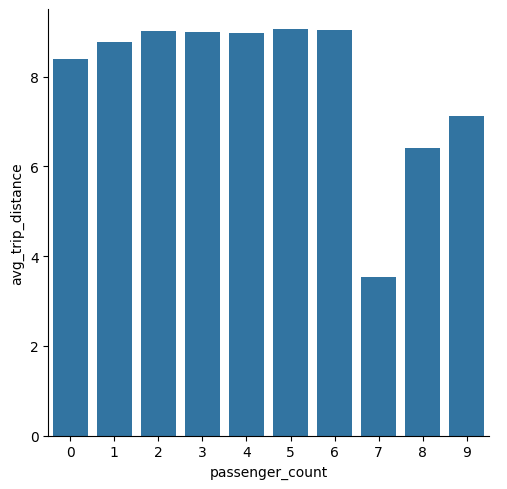

In [55]:
df = con.sql("""
    SELECT passenger_count, AVG(trip_distance) avg_trip_distance
    FROM taxi_trip_data
    GROUP BY 1
""").arrow().to_pandas()

sns.catplot(data=df, x="passenger_count", y="avg_trip_distance", kind="bar")

> 1. Calculate the speed of each trip (row) in miles per hour. Then calculate the min, average, median and max.
> 2. Calculate the average total amount by payment type.
> 3. Calculate the average total amount by payment type and passenger count.
> 4. Calculate the average distance rate (fare amount divide by trip distance) by vendor.